<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo
## 1. Kockázás
Játékszabályok: 
* Felteszed a tétet, dobsz 2 kockával 
* Ha ugyanazt dobod mindkettőn, akkor négyszeres a nyereményed.
* Ha nem ugyanaz, akkor bukta.

T.f.h. 100 pénzünk van és mindig 1 pénzt teszünk fel.

In [ ]:
import matplotlib.pyplot as plt
import random

In [ ]:
def roll_dice():
    r1 = random.randint(1,6)
    r2 = random.randint(1,6)
    if r1 == r2:
        win = True
    else: 
        win = False
    return win

In [ ]:
example = roll_dice()
example

False

In [ ]:
run = []
conto = 100  # Egy 100 pénzes menet
run.append(conto)

for k in range(500):  # Futtassuk 500-ig
    luck = roll_dice()
    if luck == True:
        conto +=4
    else:
        conto -=1
    run.append(conto)

conto

-15

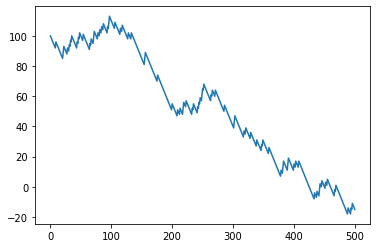

In [ ]:
fig, ax = plt.subplots()
ax.plot(run)

In [ ]:
def one_run():
    run = []
    conto = 100  # Egy 100 pénzes menet
    run.append(conto)

    for k in range(500):  # Futtassuk 500-ig
        luck = roll_dice()
        if luck == True:
            conto +=4
        else:
            conto -=1
        run.append(conto)
    return run, conto

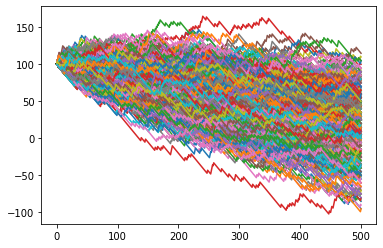

In [ ]:
contos = []
for k in range(500):
    run1, conto1 = one_run()
    contos.append(conto1)
    plt.plot(run1)

(array([ 11.,  14.,  33.,  62.,  91., 123.,  77.,  51.,  28.,  10.]),
 array([-95., -74., -53., -32., -11.,  10.,  31.,  52.,  73.,  94., 115.]),
 <BarContainer object of 10 artists>)

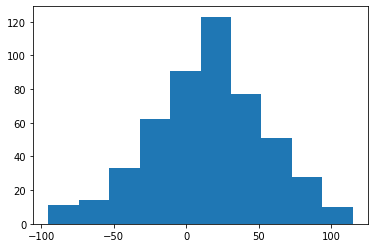

In [ ]:
plt.hist(contos)

In [ ]:
import scipy as sci
sci.mean(contos)

<ipython-input-34-65ee6cf74a5c>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sci.mean(contos)


15.13

## 2. Karakterisztikus egyenlet példa
* f(x) folyamat f
* g(y) folyamat g
* h(z) folyamat h

x,y,z rand.vars. :
* x~N(0,1)
* y~Beta(0.1,2.2)
* z~Rayleigh()

karakterisztikus egyenlet: $x^{3.4}\log(yz)$


In [ ]:
N = sci.stats.norm.rvs(size=1000)
B = sci.stats.beta.rvs(3, 2.2, size=1000)
R = sci.stats.rayleigh.rvs(size=1000)

(array([0.09585794, 0.2537416 , 0.34396083, 0.56387021, 0.60334113,
        0.54695411, 0.57514762, 0.55259281, 0.51312189, 0.46801228,
        0.30448992, 0.21427068, 0.20863198, 0.14096755, 0.09585794,
        0.07894183, 0.01691611, 0.0112774 , 0.02819351, 0.        ,
        0.0112774 , 0.0056387 , 0.0056387 ]),
 array([0.01661393, 0.19395971, 0.37130548, 0.54865126, 0.72599703,
        0.90334281, 1.08068858, 1.25803436, 1.43538013, 1.61272591,
        1.79007168, 1.96741746, 2.14476323, 2.32210901, 2.49945478,
        2.67680055, 2.85414633, 3.0314921 , 3.20883788, 3.38618365,
        3.56352943, 3.7408752 , 3.91822098, 4.09556675]),
 [<matplotlib.patches.Polygon at 0x7fc13fe9ad60>])

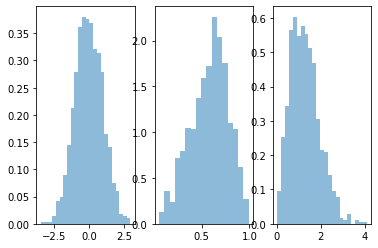

In [ ]:
fig, axs = plt.subplots(1,3)
axs[0].hist(N, density=True, bins='auto', histtype='stepfilled', alpha=0.5)
axs[1].hist(B, density=True, bins='auto', histtype='stepfilled', alpha=0.5)
axs[2].hist(R, density=True, bins='auto', histtype='stepfilled', alpha=0.5)

In [ ]:
import math
def eq(x,y,z):
    sol = x**(3.4)*math.log(y*z)
    return(sol)

In [ ]:
sols = []
for k in range(1000):
    x = sci.stats.norm.rvs(size=1)
    y = sci.stats.beta.rvs(0.1, 2.2, size=1)
    z = sci.stats.rayleigh.rvs(size=1)
    sol = eq(x,y,z)
    sols.append(sol)

<ipython-input-69-269fb3313f55>:3: RuntimeWarning: invalid value encountered in power
  sol = x**(3.4)*math.log(y*z)


(array([  3.,   0.,   0.,   1.,   3.,   7.,   8.,  13.,  31., 420.]),
 array([-281.81055385, -253.38744596, -224.96433808, -196.5412302 ,
        -168.11812232, -139.69501443, -111.27190655,  -82.84879867,
         -54.42569078,  -26.0025829 ,    2.42052498]),
 <BarContainer object of 10 artists>)

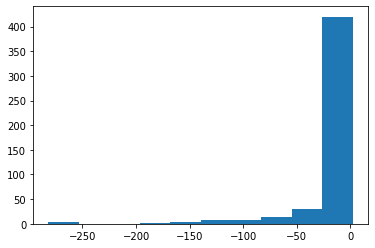

In [ ]:
import numpy as np
plt.hist(np.asarray(sols))